In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Master_File_Housing_Data_LogisticReg2.csv')

df= dataset.dropna(how='any', subset=['CONSTRUCTIONTYPE'])
df['BELOWGROUNDAREA'].fillna(0,inplace=True)

X = df.iloc[:,2:-2].values
y = df.iloc[:,14].values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X[:,[1,3,5,6,7,8,10]])
X[:,[1,3,5,6,7,8,10]]= imputer.transform(X[:,[1,3,5,6,7,8,10]])

#print(X[0])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 9] = labelencoder.fit_transform(X[:, 9])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,9])
data = onehotencoder.fit_transform(X).toarray()
#print(data[0])
X2 = data[:,[0,1,2,3,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25]]
NewData=X2

X_sig = NewData[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,22,23]]
print(X_sig[0])


import statsmodels.api as sm


#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)


[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 3.4300e+02 1.1634e+04 1.0000e+00
 1.0000e+00 0.0000e+00 9.1500e+04]


C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.


LDA with 1 Components (need to reduce from 2 to 1 to perform LDA)

C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


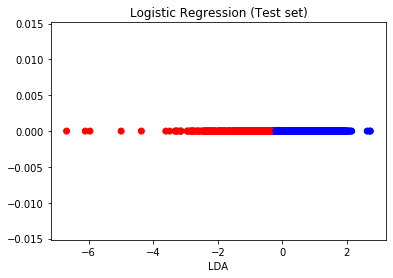

In [8]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=1)
X_train = ldaObj.fit_transform(X_train,y_train)
X_test = ldaObj.transform(X_test)
components_variance = ldaObj.explained_variance_ratio_

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
plt.scatter(X_test,y_test*0, c=y_pred, cmap = ListedColormap(('red', 'blue')))
plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA')
plt.show()



In [9]:
cm

array([[347, 423],
       [258, 678]], dtype=int64)

In [10]:
#Model Accuracy
print("Model Accuracy LDA 1 Components=", classifierObj.score(X_test,y_test))

Model Accuracy LDA 1 Components= 0.6008206330597889


[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 3.4300e+02 1.1634e+04 1.0000e+00
 1.0000e+00 0.0000e+00 9.1500e+04]


C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.


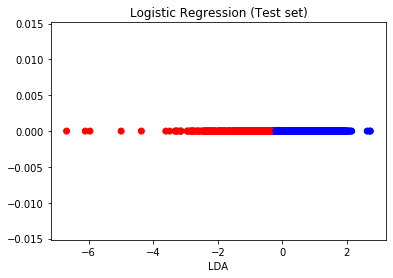

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Master_File_Housing_Data_LogisticReg2.csv')

df= dataset.dropna(how='any', subset=['CONSTRUCTIONTYPE'])
df['BELOWGROUNDAREA'].fillna(0,inplace=True)

X = df.iloc[:,2:-2].values
y = df.iloc[:,14].values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X[:,[1,3,5,6,7,8,10]])
X[:,[1,3,5,6,7,8,10]]= imputer.transform(X[:,[1,3,5,6,7,8,10]])

#print(X[0])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 9] = labelencoder.fit_transform(X[:, 9])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,9])
data = onehotencoder.fit_transform(X).toarray()
#print(data[0])
NewData = data[:,[0,1,2,3,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25]]

X_sig = NewData[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,22,23]]
print(X_sig[0])

import statsmodels.api as sm

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=None)
X_train = ldaObj.fit_transform(X_train,y_train)
X_test = ldaObj.transform(X_test)
components_variance = ldaObj.explained_variance_ratio_

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
plt.scatter(X_test,y_test*0, c=y_pred, cmap = ListedColormap(('red', 'blue')))
plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA')
plt.show()

In [12]:
#Model Accuracy
print("Model Accuracy LDA None Components=", classifierObj.score(X_test,y_test))

Model Accuracy LDA None Components= 0.6008206330597889


PCA results
2 components:Not possible
1 Component: 60.08% 0.6008206330597889
None: 60.08% 0.6008206330597889